In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [272]:
airQ_data = pd.read_csv('../Datasets/AirQuality/AirQualityData_3/airquality-1998_2017.csv', low_memory =False)
len(airQ_data)
airQ_data.tail()

,id,city_name,state_name,Week,Year,avg_aqi
61771,61382,Long Beach,California,53,2017,127.333333
61772,61454,Anaheim,California,53,2017,116.000000
61773,61540,El Cajon,California,53,2017,92.000000
61774,61596,Chico,California,53,2017,95.000000
61775,61764,Yuba City,California,53,2017,82.000000


In [273]:
len(airQ_data)

61776

In [274]:
#Removing city and taking avg
airQ_data_mean = airQ_data.groupby(['state_name','Week','Year'])['avg_aqi'].mean().reset_index()
airQ_data_mean.head()

,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [275]:
len(airQ_data_mean)

1011

In [276]:
#dropping 0 values
indexNames = airQ_data_mean[ (airQ_data_mean['avg_aqi'] == 0.000000)].index
airQ_data_mean.drop(indexNames , inplace=True)
airQ_data_mean.head()


,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [277]:
len(airQ_data_mean)

1011

In [278]:
airQ_data_mean['Week'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [279]:
#increasing week number by 1 to match influenza data
airQ_data_mean['Week'] = airQ_data_mean['Week']+1
airQ_data_mean['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [280]:
airQ_data_mean['Year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010,
       2011, 2013, 2014, 2015, 2016, 2006, 2012, 2017, 1998], dtype=int64)

In [11]:
airQ_data_mean

,state_name,Week,Year,avg_aqi
0,California,1,1999,92.500000
1,California,1,2000,75.437500
2,California,1,2001,87.254457
3,California,1,2002,61.261568
4,California,1,2003,55.143505
...,...,...,...,...
1006,California,53,2017,78.873386
1007,California,54,2000,130.863636
1008,California,54,2006,83.514493
1009,California,54,2012,63.000000


In [281]:
#we will use this influenza data
influenza_data = pd.read_csv('../Datasets/Disease cases/influenza/AgeViewByWeek_Influenza.csv', low_memory=False)
influenza_data.head()

,Year,Week,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,2019,40,(0-4)yr,0,0,4,3,4,6,0,1,0
1,2019,41,(0-4)yr,0,0,2,5,3,15,0,0,0
2,2019,42,(0-4)yr,0,0,14,3,0,15,0,4,0
3,2019,43,(0-4)yr,0,0,4,4,0,12,0,3,0
4,2019,44,(0-4)yr,0,0,7,6,0,12,1,0,0


In [282]:
influenza_data['AgeGroup'].unique()

array(['(0-4)yr', '(5-24)yr', '(25-64)yr', '(65+)yr'], dtype=object)

In [283]:
influenza_data['Year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997], dtype=int64)

In [284]:
#merging AQ data && influenza data

merged = pd.merge(airQ_data_mean,influenza_data,how='inner', left_on=['Year', 'Week'], right_on=['Year','Week'])

In [16]:
len(merged)

3944

In [285]:
merged

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,California,1,1999,92.500000,(0-4)yr,0,0,7,0,1,0,0,7,0
1,California,1,1999,92.500000,(5-24)yr,0,0,14,0,5,0,0,15,0
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0
3,California,1,1999,92.500000,(65+)yr,0,0,12,0,14,0,0,6,0
4,California,1,2000,75.437500,(0-4)yr,1,0,47,0,27,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,California,53,2009,54.811905,(65+)yr,0,1,0,61,4,0,0,0,0
3940,California,53,2014,53.122396,(0-4)yr,0,0,246,0,1,0,0,12,0
3941,California,53,2014,53.122396,(5-24)yr,0,0,347,0,6,0,0,21,0
3942,California,53,2014,53.122396,(25-64)yr,0,0,847,0,4,0,0,37,0


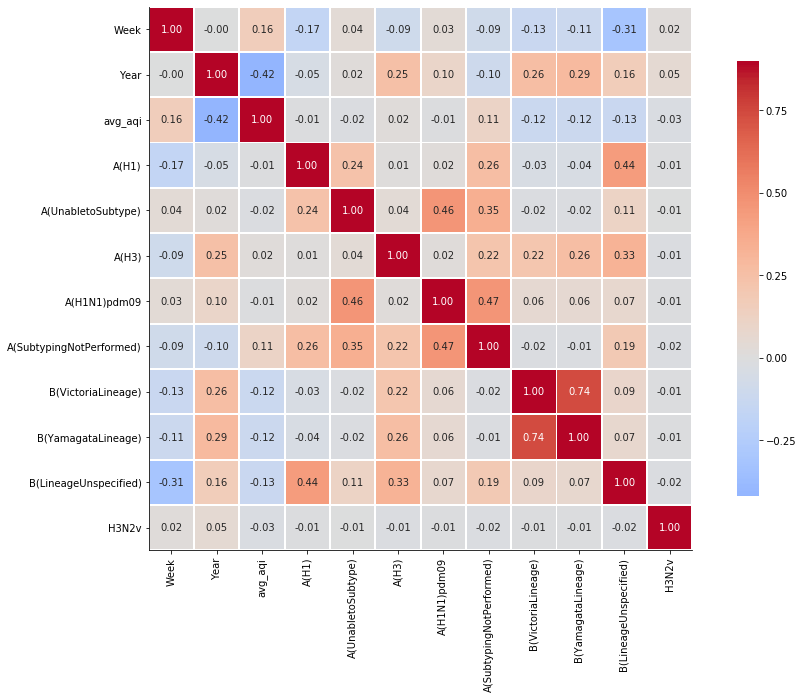

In [286]:
corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [287]:
merged_filtered = merged[merged['AgeGroup'] == '(25-64)yr']
influenza_data['AgeGroup'].unique()

array(['(0-4)yr', '(5-24)yr', '(25-64)yr', '(65+)yr'], dtype=object)

In [288]:
merged_filtered.head()

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0
6,California,1,2000,75.437500,(25-64)yr,0,0,132,0,80,0,0,0,0
10,California,1,2001,87.254457,(25-64)yr,36,0,1,0,6,0,0,31,0
14,California,1,2002,61.261568,(25-64)yr,0,0,33,0,7,0,0,1,0
18,California,1,2003,55.143505,(25-64)yr,13,0,4,0,1,0,0,6,0


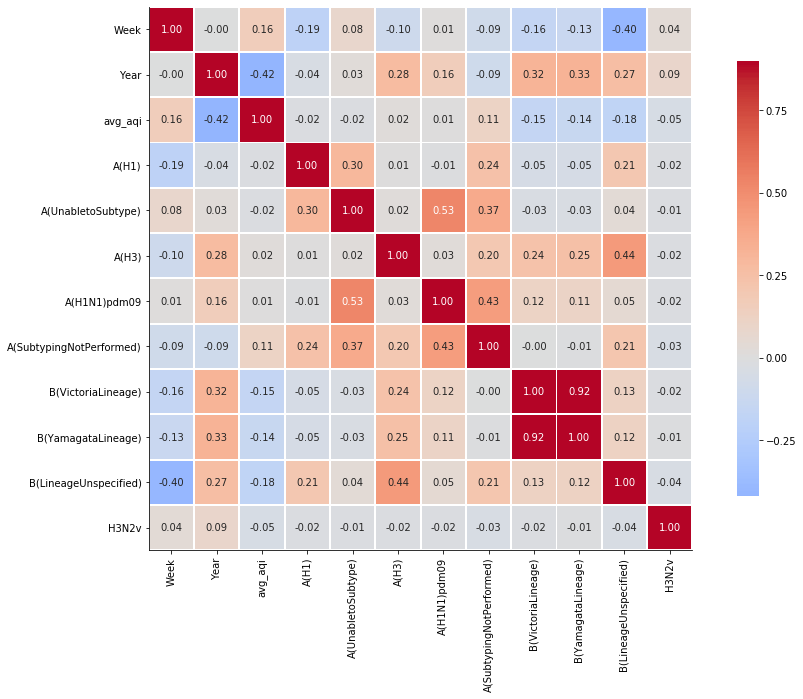

In [21]:
corr = merged_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

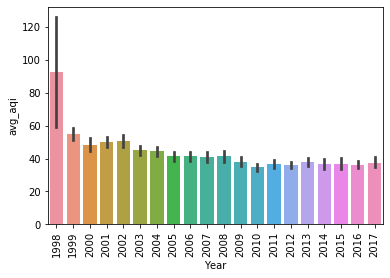

In [22]:
sns.barplot(x='Year', y='avg_aqi', data=merged_filtered, saturation=0.8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

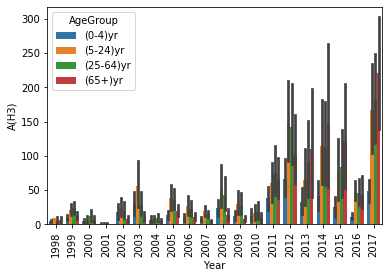

In [23]:
sns.barplot(x='Year', y='A(H3)', hue='AgeGroup', data=merged, saturation=0.8)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

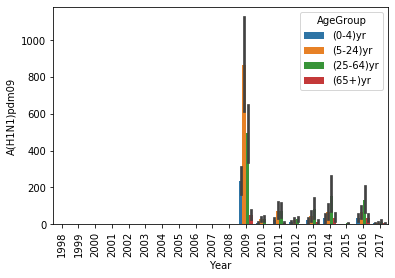

In [24]:
sns.barplot(x='Year', y='A(H1N1)pdm09', hue='AgeGroup', data=merged, saturation=0.8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

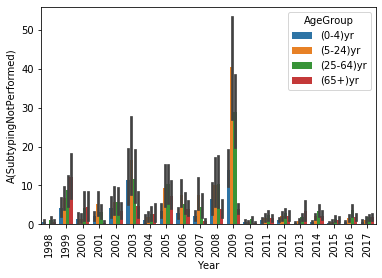

In [25]:
sns.barplot(x='Year', y='A(SubtypingNotPerformed)', hue='AgeGroup', data=merged, saturation=0.8)
plt.xticks(rotation=90)


In [26]:
merged

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,California,1,1999,92.500000,(0-4)yr,0,0,7,0,1,0,0,7,0
1,California,1,1999,92.500000,(5-24)yr,0,0,14,0,5,0,0,15,0
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0
3,California,1,1999,92.500000,(65+)yr,0,0,12,0,14,0,0,6,0
4,California,1,2000,75.437500,(0-4)yr,1,0,47,0,27,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,California,53,2009,54.811905,(65+)yr,0,1,0,61,4,0,0,0,0
3940,California,53,2014,53.122396,(0-4)yr,0,0,246,0,1,0,0,12,0
3941,California,53,2014,53.122396,(5-24)yr,0,0,347,0,6,0,0,21,0
3942,California,53,2014,53.122396,(25-64)yr,0,0,847,0,4,0,0,37,0


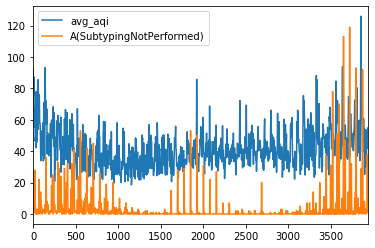

In [27]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AgeGroup'] == '(0-4)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

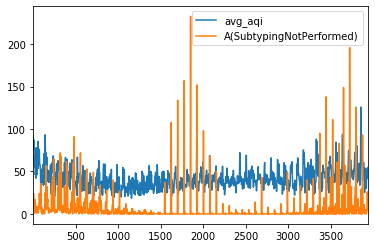

In [28]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AgeGroup'] == '(5-24)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

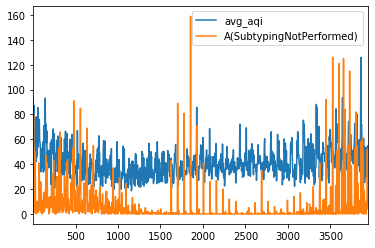

In [29]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

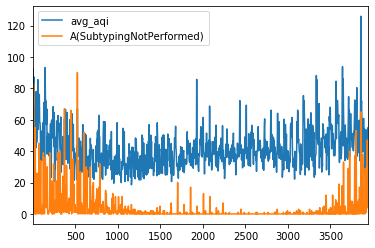

In [30]:
#plotting AQ index value vs. Virus vs age group
merged_filtered=merged[merged['AgeGroup'] == '(65+)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5, 2020. ]), <a list of 11 Text xticklabel objects>)

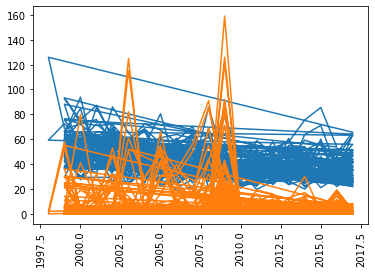

In [31]:
plt.figure()

merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']


x = merged_filtered['Year']
y1 = merged_filtered['avg_aqi'] 
y2 = merged_filtered['A(SubtypingNotPerformed)']


plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation=90)

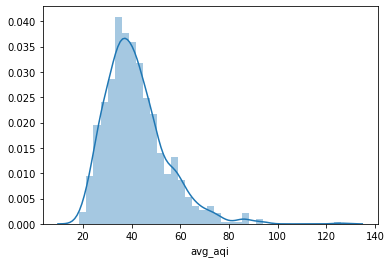

In [32]:
sns.distplot(merged_filtered['avg_aqi'])
plt.show()

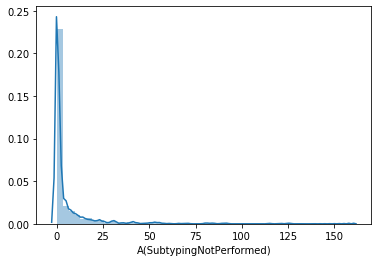

In [33]:
sns.distplot(merged_filtered['A(SubtypingNotPerformed)'])
plt.show()

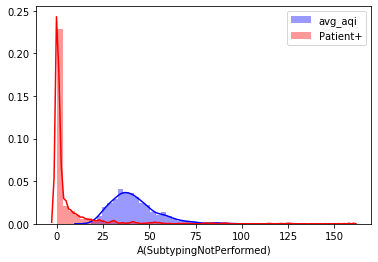

In [34]:
# Method 1: on the same Axis
sns.distplot( (merged_filtered["avg_aqi"]) , color="blue", label="avg_aqi")
sns.distplot( merged_filtered["A(SubtypingNotPerformed)"] , color="red", label="Patient+")
plt.legend()
 
plt.show()


In [210]:
merged.columns

Index(['state_name', 'Week', 'Year', 'avg_aqi', 'AgeGroup', 'A(H1)',
       'A(UnabletoSubtype)', 'A(H3)', 'A(H1N1)pdm09',
       'A(SubtypingNotPerformed)', 'B(VictoriaLineage)', 'B(YamagataLineage)',
       'B(LineageUnspecified)', 'H3N2v', 'NewMonth', 'Month', 'MonthNo',
       'MonthNo_date'],
      dtype='object')

In [209]:
import datetime
merged['Month']= merged['Year'].astype(str).map(str) + "-W"+ merged['Week'].astype(str)
for a in range(0,len(merged)):
    merged.ix[a, 'MonthNo']= datetime.datetime.strptime(merged.ix[a, 'Month'] + '-1', '%G-W%V-%u')
    #print(pd.Timestamp(np.datetime64(merged.ix[a, 'MonthNo'])).to_pydatetime())
    merged.ix[a,'MonthNo_date']=pd.Timestamp(np.datetime64(merged.ix[a, 'MonthNo'])).to_pydatetime()
    #merged.ix[a, 'MonthNo']= datetime.datetime.strptime((merged.ix[a, 'MonthNo']).astype(str), "%Y-%m")

merged['MonthNo_date']= merged.MonthNo_date.dt.year.astype(str).map(str) + "-"+ merged.MonthNo_date.dt.month.astype(str)
merged['MonthNo_date'].unique


c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


<bound method Series.unique of 0        1999-1
1        1999-1
2        1999-1
3        1999-1
4        2000-1
         ...   
3939    2009-12
3940    2014-12
3941    2014-12
3942    2014-12
3943    2014-12
Name: MonthNo_date, Length: 3944, dtype: object>

In [246]:
merged.head()
merged_f= merged[merged['AgeGroup'] == '(25-64)yr']
#monthly -> yearly Mean value: method 1
merged_monthly = merged_f.groupby(['state_name', 'Year','AgeGroup','MonthNo_date'])['avg_aqi', 'A(H1)',
       'A(UnabletoSubtype)', 'A(H3)', 'A(H1N1)pdm09',
       'A(SubtypingNotPerformed)', 'B(VictoriaLineage)', 'B(YamagataLineage)',
       'B(LineageUnspecified)', 'H3N2v'].mean().reset_index()
merged_monthly.head()
len(merged_monthly)
#merged_monthly.to_csv('../Datasets/merged_monthly.csv')

236

In [293]:
merged['AgeGroup']=merged['AgeGroup'].astype('category')
merged['AgeGroupCat']= merged['AgeGroup'].cat.codes

In [294]:
# Prep Training and Test data -from combined age group
trainData, testData = train_test_split(merged, train_size=0.7, random_state=100)

In [295]:
merged.columns

Index(['state_name', 'Week', 'Year', 'avg_aqi', 'AgeGroup', 'A(H1)',
       'A(UnabletoSubtype)', 'A(H3)', 'A(H1N1)pdm09',
       'A(SubtypingNotPerformed)', 'B(VictoriaLineage)', 'B(YamagataLineage)',
       'B(LineageUnspecified)', 'H3N2v', 'AgeGroupCat'],
      dtype='object')

In [38]:
1. #with Target Virus = A(SubtypingNotPerformed)

1.0

In [297]:
#X and Y(target) for linear regression
Y_trainData = trainData[['A(SubtypingNotPerformed)']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['A(SubtypingNotPerformed)']]
X_testData= testData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 ) #,'AgeGroup'


In [299]:
X_trainData.head()

,Week,Year,avg_aqi,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v,AgeGroupCat
3029,41,1999,55.768203,0,0,2,0,0,0,0,0,2
2738,37,2002,43.712812,0,0,0,0,0,0,0,0,1
3273,44,2003,51.679187,0,0,53,0,0,0,0,0,2
2758,37,2007,36.955062,2,0,1,0,0,0,0,0,1
2532,34,2008,31.039425,0,0,0,0,0,0,0,0,0


In [300]:
# Creating linear regression model.
lr_model = LinearRegression()
lr_model.fit(X_trainData,Y_trainData)

# print the R-squared value for the model
print('Training score%: ',lr_model.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lr_model.score(X_testData,Y_testData)*100, '%')

y_pred = lr_model.predict(X_testData)
mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

# Get the slope and intercept of the line best fit.
print(lr_model.intercept_)
print(lr_model.coef_)


Training score%:  40.73878326609811 %
Test score:  21.90549366449588 %
RMSE: 9.769242678182351
[893.27181565]
[[-0.06434262 -0.44403546  0.04596145  0.14340828  0.74981999  0.02800091
   0.0346323  -0.04848399 -0.03271671 -0.00342261  0.03422085 -0.02245562]]


In [41]:
#for individual age group 
merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']
# Prep Training and Test data -from combined age group
trainData, testData = train_test_split(merged_filtered, train_size=0.7, random_state=100)

In [42]:
#X and Y(target) for linear regression-individual age group 
Y_trainData = trainData[['A(SubtypingNotPerformed)']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['A(SubtypingNotPerformed)']]
X_testData= testData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )

In [43]:
# Creating linear regression model--individual age group
lr_model = LinearRegression()
lr_model.fit(X_trainData,Y_trainData)

# print the R-squared value for the model
print('Training score%: ',lr_model.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lr_model.score(X_testData,Y_testData)*100, '%')

y_pred = lr_model.predict(X_testData)
mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

# Get the slope and intercept of the line best fit.
print('intercept:',lr_model.intercept_)
print('coef', lr_model.coef_)

 

Training score%:  32.03051192168361 %
Test score:  37.59417144130437 %
RMSE: 13.169440258002954
intercept: [1115.41710128]
coef [[ 0.01277052 -0.55652329  0.0730069   0.14381185  0.49667608  0.02033681
   0.0260189   0.12846431 -0.05151471  0.08143427  0.94706165]]


In [44]:
#creating polynomial features--individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_trainData, Y_trainData)

print('Training score%: ',pipeline.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',pipeline.score(X_testData, Y_testData)*100, '%')
# Testing score has decreased due to overfitting

Training score%:  85.97305343366507 %
Test score:  -34.611589104059746 %


In [45]:
#l2 Regularization or Ridge Regression-alpha value =50-individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=50, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_trainData, Y_trainData)


print('Training score%: ',ridge_pipe.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',ridge_pipe.score(X_testData, Y_testData)*100, '%')

mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  74.65792204978776 %
Test score:  52.01417638912291 %
RMSE: 13.169440258002954


In [46]:
# l1 Regularization or Lasso Regression-individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_trainData, Y_trainData)


print('Training score%: ',lasso_pipe.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lasso_pipe.score(X_testData, Y_testData)*100, '%')

mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  78.84676768031052 %
Test score:  57.183529404372344 %
RMSE: 13.169440258002954


In [47]:
2. #with Target Virus = A(H1N1)pdm09

2.0

In [48]:
# Prep Training and Test data -from combined age group
trainData, testData = train_test_split(merged, train_size=0.7, random_state=100)

#X and Y(target) for linear regression-combined age group 
Y_trainData = trainData[['A(H1N1)pdm09']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(H1N1)pdm09'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['A(H1N1)pdm09']]
X_testData= testData.drop(['state_name','AgeGroup','A(H1N1)pdm09'], axis =1 )


In [49]:
# Creating linear regression model.-combined age group
lr_model = LinearRegression()
lr_model.fit(X_trainData,Y_trainData)

# print the R-squared value for the model
print('Training score%: ',lr_model.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lr_model.score(X_testData,Y_testData)*100, '%')

y_pred = lr_model.predict(X_testData)
mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

# Get the slope and intercept of the line best fit.
print(lr_model.intercept_)
print(lr_model.coef_)

Training score%:  39.72149560453185 %
Test score:  31.21165241224957 %
RMSE: 129.85435564481924
[-10760.46652854]
[[ 0.54044155  5.34888089  0.4244501  -1.54353534 28.34071895 -0.22420033
   6.11825589  1.68070471  0.31076427  0.26858919 -1.48845689]]


In [50]:
#for individual age group 
merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']
# Prep Training and Test data -from combined age group
trainData, testData = train_test_split(merged_filtered, train_size=0.7, random_state=100)


In [51]:
#X and Y(target) for linear regression- 
Y_trainData = trainData[['A(H1N1)pdm09']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(H1N1)pdm09'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['A(H1N1)pdm09']]
X_testData= testData.drop(['state_name','AgeGroup','A(H1N1)pdm09'], axis =1 )

In [52]:
# Creating linear regression model--individual age group
lr_model = LinearRegression()
lr_model.fit(X_trainData,Y_trainData)

# print the R-squared value for the model
print('Training score%: ',lr_model.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lr_model.score(X_testData,Y_testData)*100, '%')

y_pred = lr_model.predict(X_testData)
mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

# Get the slope and intercept of the line best fit.
print('intercept:',lr_model.intercept_)
print('coef', lr_model.coef_)

Training score%:  40.22293724324939 %
Test score:  48.4057703194071 %
RMSE: 158.0407140843812
intercept: [-17218.33072665]
coef [[ -1.42421105   8.58175172   1.4649795   -3.43529968  39.49202673
   -0.23163596   4.60979999   4.76394783  -0.15979991   0.18365765
  -32.03734626]]


In [53]:
#l2 Regularization or Ridge Regression-alpha value =10-individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_trainData, Y_trainData)


print('Training score%: ',ridge_pipe.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',ridge_pipe.score(X_testData, Y_testData)*100, '%')

mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  80.24793548706543 %
Test score:  54.5789288133153 %
RMSE: 158.0407140843812


In [54]:
# l1 Regularization or Lasso Regression-individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_trainData, Y_trainData)


print('Training score%: ',lasso_pipe.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lasso_pipe.score(X_testData, Y_testData)*100, '%')

mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  81.3576600659263 %
Test score:  64.48065456898466 %
RMSE: 158.0407140843812


c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2645282.521094946, tolerance: 3019.3341421739183
  positive)


In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [257]:
merged_var=merged_monthly[(merged_monthly['AgeGroup'] == '(25-64)yr')] 
len(merged_var)

236

In [254]:
merged_var.columns

<bound method Series.unique of 0       1999
1       1999
2       1999
3       1999
4       2000
        ... 
3939    2009
3940    2014
3941    2014
3942    2014
3943    2014
Name: Year, Length: 3944, dtype: int64>

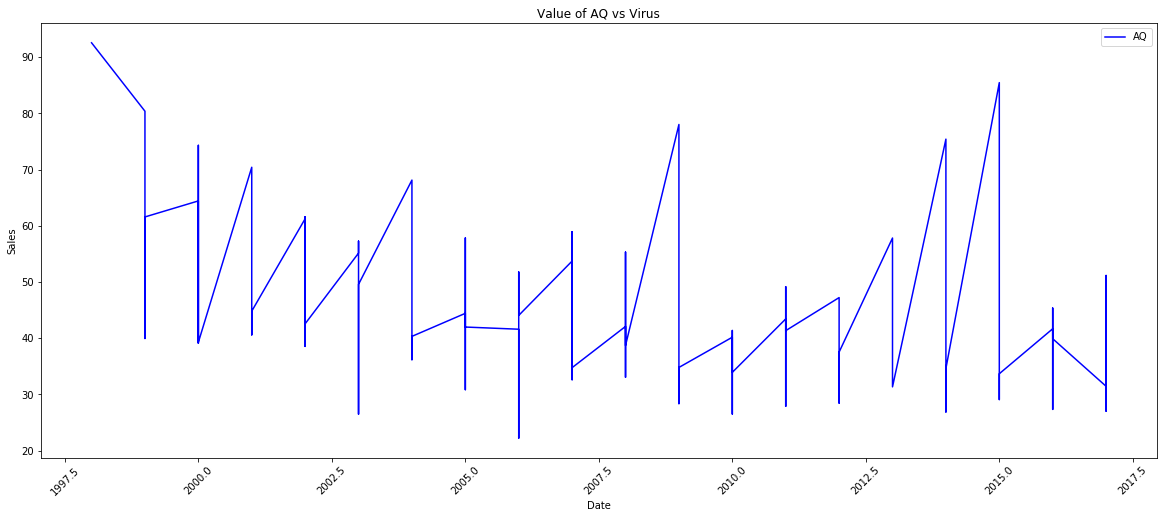

In [270]:
plt.figure(figsize=(20, 8))
plt.plot(merged_var['Year'], merged_var['avg_aqi'], 'b-', label = 'AQ')
#plt.plot(merged_var['MonthNo_date'], merged_var['A(H1N1)pdm09'], 'r-', label = 'Virus')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Value of AQ vs Virus')
plt.xticks(rotation=45)
plt.legend();

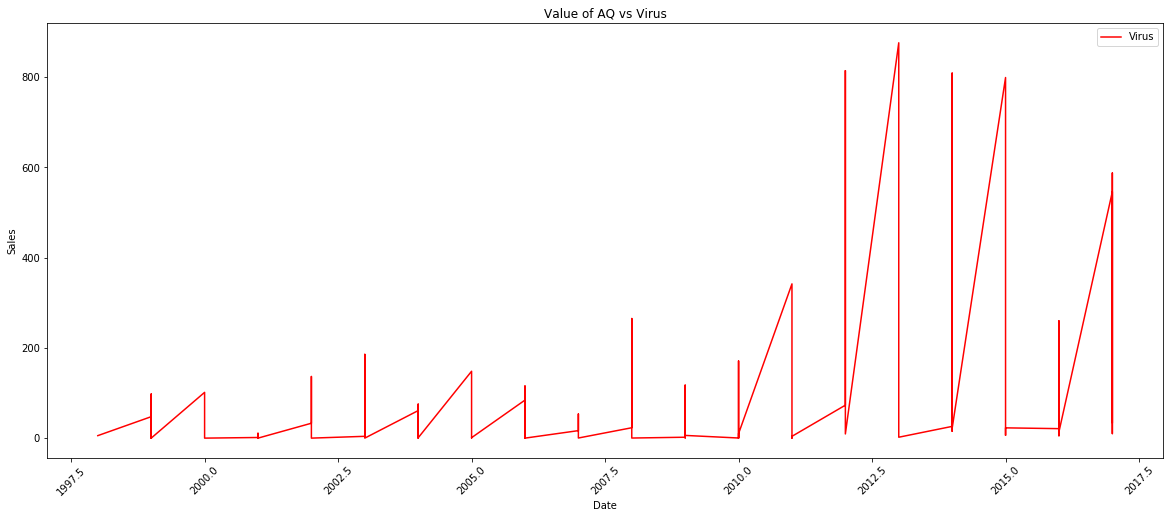

In [269]:
plt.figure(figsize=(20, 8))
#plt.plot(merged_var['MonthNo_date'], merged_var['avg_aqi'], 'b-', label = 'AQ')
plt.plot(merged_var['Year'], merged_var['A(H3)'], 'r-', label = 'Virus')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Value of AQ vs Virus')
plt.xticks(rotation=45)
plt.legend();

In [250]:

merged_var= merged_var.drop(['state_name', 'Year','AgeGroup','H3N2v'], axis =1 )
merged_var.head()

,MonthNo_date,avg_aqi,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified)
0,1998-12,92.583333,0.5,0.0,5.50,0.0,1.00,0.0,0.0,6.00
1,1999-1,80.402680,0.0,0.0,47.50,0.0,9.25,0.0,0.0,20.50
2,1999-10,62.545959,0.0,0.0,8.25,0.0,1.75,0.0,0.0,0.25
3,1999-11,66.072382,0.0,0.0,42.20,0.0,9.80,0.0,0.0,0.00
4,1999-12,66.110907,0.0,0.0,97.75,0.0,50.50,0.0,0.0,0.00


In [251]:
#setting the new month as index
merged_var.NewMonth = pd.to_datetime(merged_var["MonthNo_date"])
merged_var.set_index('MonthNo_date', inplace=True)

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


IndexError: index 9 is out of bounds for axis 0 with size 9

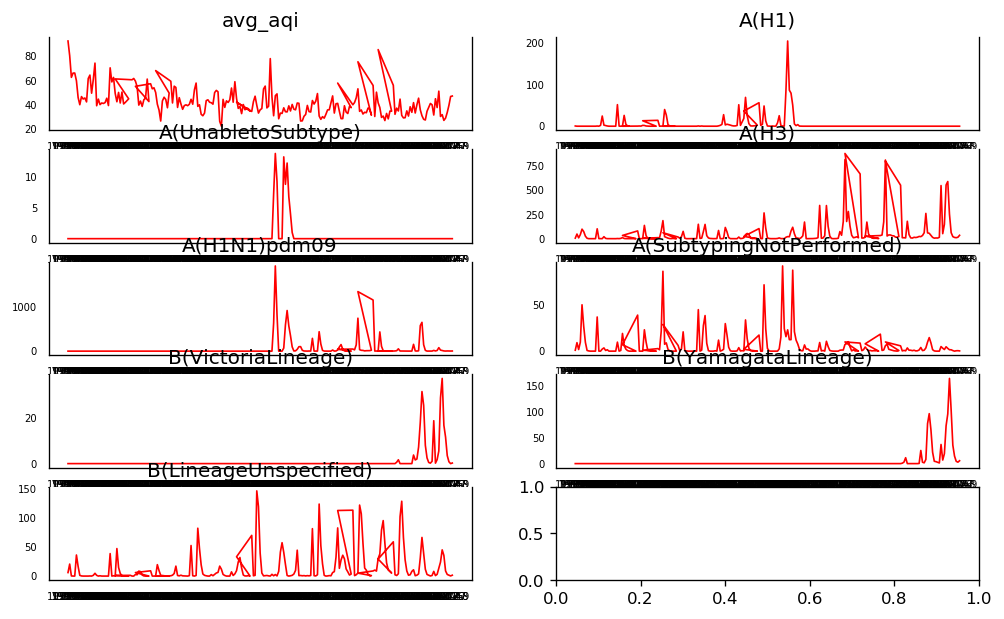

In [252]:
# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = merged_var[merged_var.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(merged_var.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [225]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    merged_var = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in merged_var.columns:
        for r in merged_var.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            merged_var.loc[r, c] = min_p_value
    merged_var.columns = [var + '_x' for var in variables]
    merged_var.index = [var + '_y' for var in variables]
    return merged_var

grangers_causation_matrix(merged_var, variables = merged_var.columns)   

#avg_aqi_x causing A(H1N1)pdm09_y with p-val = .0074

#So, how to interpret the p-values?
#If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).
#Grangers Causality test

,avg_aqi_x,A(H1)_x,A(UnabletoSubtype)_x,A(H3)_x,A(H1N1)pdm09_x,A(SubtypingNotPerformed)_x,B(VictoriaLineage)_x,B(YamagataLineage)_x,B(LineageUnspecified)_x
avg_aqi_y,1.0000,0.0228,0.3297,0.0003,0.0269,0.0172,0.0573,0.0243,0.0000
A(H1)_y,0.1418,1.0000,0.0000,0.3801,0.0000,0.0000,0.6597,0.6597,0.0505
A(UnabletoSubtype)_y,0.0058,0.0000,1.0000,0.8825,0.0000,0.0000,0.8066,0.8066,0.0576
A(H3)_y,0.0003,0.6947,0.6757,1.0000,0.0341,0.1442,0.0028,0.0001,0.0005
A(H1N1)pdm09_y,0.0633,0.0161,0.0000,0.1465,1.0000,0.4524,0.7421,0.7025,0.0063
A(SubtypingNotPerformed)_y,0.0069,0.0000,0.0000,0.3493,0.0162,1.0000,0.6194,0.5993,0.1927
B(VictoriaLineage)_y,0.4627,0.7368,0.8207,0.0224,0.3689,0.8345,1.0000,0.0000,0.0524
B(YamagataLineage)_y,0.0862,0.7657,0.8407,0.0017,0.7911,0.7691,0.0000,1.0000,0.0162
B(LineageUnspecified)_y,0.0171,0.4069,0.3895,0.0022,0.4040,0.4563,0.4726,0.3925,1.0000


In [226]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(merged_var)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
avg_aqi ::  344.01    > 179.5199  =>   True
A(H1)  ::  249.33    > 143.6691  =>   True
A(UnabletoSubtype) ::  177.75    > 111.7797  =>   True
A(H3)  ::  116.44    > 83.9383   =>   True
A(H1N1)pdm09 ::  73.44     > 60.0627   =>   True
A(SubtypingNotPerformed) ::  47.77     > 40.1749   =>   True
B(VictoriaLineage) ::  29.88     > 24.2761   =>   True
B(YamagataLineage) ::  13.64     > 12.3212   =>   True
B(LineageUnspecified) ::  0.78      > 4.1296    =>   False


In [227]:
trainData, testData = train_test_split(merged_var, train_size=0.7, random_state=100)
Y_trainData = trainData[['A(H1N1)pdm09']]
X_trainData= trainData.drop(['A(H1N1)pdm09'], axis =1 )
X_trainData.head()

,avg_aqi,A(H1),A(UnabletoSubtype),A(H3),A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified)
MonthNo_date,,,,,,,,
2011-1,43.424220,0.00,0.0,341.80,9.40,0.0,0.00,81.00
2015-10,32.036482,0.00,0.0,9.75,0.25,0.0,0.75,2.25
2014-2,37.636849,0.00,0.0,27.50,7.50,0.0,0.00,37.75
1999-4,39.947227,0.00,0.0,4.00,0.75,0.0,0.00,1.25
2001-12,49.259144,0.25,0.0,10.75,19.25,0.0,0.00,0.00


In [228]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [229]:
# ADF Test on each column
for name, column in trainData.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "avg_aqi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.5524
 No. Lags Chosen       = 0
 Critical value 1%     = -3.471
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A(H1)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.6226
 No. Lags Chosen       = 2
 Critical value 1%     = -3.471
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A(UnabletoSubtype)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significanc

In [230]:
# 1st difference
df_differenced = trainData.diff().dropna()

In [231]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "avg_aqi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.1726
 No. Lags Chosen       = 12
 Critical value 1%     = -3.474
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A(H1)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.5381
 No. Lags Chosen       = 3
 Critical value 1%     = -3.472
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A(UnabletoSubtype)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

In [232]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [233]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "avg_aqi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.3835
 No. Lags Chosen       = 14
 Critical value 1%     = -3.475
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A(H1)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.2447
 No. Lags Chosen       = 9
 Critical value 1%     = -3.474
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A(UnabletoSubtype)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

In [234]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  61.4879961605607
BIC :  63.20332745791202
FPE :  5.064210415936858e+26
HQIC:  62.18444670085142 

Lag Order = 2
AIC :  59.28186903304813
BIC :  62.55466497349747
FPE :  5.624804800264036e+25
HQIC:  60.61075713385164 

Lag Order = 3
AIC :  58.43389817466418
BIC :  63.27729693365746
FPE :  2.4646041639042026e+25
HQIC:  60.400634611657004 

Lag Order = 4
AIC :  57.77957466506128
BIC :  64.20690233386215
FPE :  1.3405910856573155e+25
HQIC:  60.389643997966566 

Lag Order = 5
AIC :  57.248436803333234
BIC :  65.27321113037858
FPE :  8.520528294403665e+24
HQIC:  60.50739870895271 

Lag Order = 6
AIC :  56.78942248125142
BIC :  66.425356708305
FPE :  6.087082590776681e+24
HQIC:  60.70291311503921 

Lag Order = 7
AIC :  56.40395701785268
BIC :  67.66496381385097
FPE :  4.972138976609496e+24
HQIC:  60.977690404669815 

Lag Order = 8
AIC :  55.61439609509003
BIC :  68.51459159067677
FPE :  2.940477383784152e+24
HQIC:  60.85416554978877 

Lag Order = 9
AIC :  54.8382220921209

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [235]:
#train the var model of selected order

model_fitted = model.fit(7)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 02, Dec, 2019
Time:                     00:58:51
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    67.6650
Nobs:                     156.000    HQIC:                   60.9777
Log likelihood:          -5815.70    FPE:                4.97214e+24
AIC:                      56.4040    Det(Omega_mle):     2.25352e+23
--------------------------------------------------------------------
Results for equation avg_aqi
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                              -0.000070         1.167446           -0.000           1.000
L1.avg_aqi                         -1.368778         0.114164          -11.990           0.000
L1

In [236]:
def adjust(val, length= 6): return str(val).ljust(length)

In [237]:
#serial corerelation

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(merged_var.columns, out):
    print(adjust(col), ':', round(val, 2))

avg_aqi : 2.12
A(H1)  : 2.04
A(UnabletoSubtype) : 1.9
A(H3)  : 1.84
A(H1N1)pdm09 : 1.91
A(SubtypingNotPerformed) : 2.04
B(VictoriaLineage) : 2.17
B(YamagataLineage) : 2.19
B(LineageUnspecified) : 2.08


In [238]:
#forcast VAR using stat model

# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

7


array([[-4.61095579e+00,  3.75000000e+00,  0.00000000e+00,
        -1.50000000e+00,  1.32500000e+02,  4.75000000e+00,
         0.00000000e+00,  0.00000000e+00,  7.00000000e+00],
       [ 2.75955169e+00,  0.00000000e+00,  0.00000000e+00,
         6.87500000e+01, -2.76250000e+02,  2.52500000e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.80334070e+01,  0.00000000e+00,  0.00000000e+00,
        -1.37500000e+02,  1.40000000e+02, -5.40000000e+01,
         0.00000000e+00,  0.00000000e+00,  2.50000000e-01],
       [ 1.88995139e+01,  1.85000000e+01,  0.00000000e+00,
         7.97500000e+01,  0.00000000e+00,  2.80000000e+01,
         0.00000000e+00,  0.00000000e+00,  1.02500000e+01],
       [ 6.14157903e+00, -3.70000000e+01,  0.00000000e+00,
         5.83333333e+01,  0.00000000e+00,  2.05000000e+01,
         0.00000000e+00,  0.00000000e+00, -1.50000000e+00],
       [-2.41413694e+01,  1.85000000e+01,  0.00000000e+00,
        -1.41666667e+02,  0.00000000e+00, -4.175000

In [239]:
merged_var.head()

,avg_aqi,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified)
MonthNo_date,,,,,,,,,
1998-12,92.583333,0.5,0.0,5.50,0.0,1.00,0.0,0.0,6.00
1999-1,80.402680,0.0,0.0,47.50,0.0,9.25,0.0,0.0,20.50
1999-10,62.545959,0.0,0.0,8.25,0.0,1.75,0.0,0.0,0.25
1999-11,66.072382,0.0,0.0,42.20,0.0,9.80,0.0,0.0,0.00
1999-12,66.110907,0.0,0.0,97.75,0.0,50.50,0.0,0.0,0.00


In [240]:
#forcast

# Forecast
nobs=225
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=merged_var.index[-nobs:], columns=merged_var.columns + '_2d')
df_forecast

,avg_aqi_2d,A(H1)_2d,A(UnabletoSubtype)_2d,A(H3)_2d,A(H1N1)pdm09_2d,A(SubtypingNotPerformed)_2d,B(VictoriaLineage)_2d,B(YamagataLineage)_2d,B(LineageUnspecified)_2d
MonthNo_date,,,,,,,,,
1999-8,1.089760,3.876395,0.060848,136.208686,-94.242267,3.744241,0.994548,2.817306,-0.560420
1999-9,-12.540160,-18.672749,-0.911852,-275.409133,62.030755,-14.787138,-0.677759,-1.419666,-14.788762
2000-1,6.375640,28.218164,1.222304,205.350752,14.646406,14.611133,-1.914726,-4.965353,29.084430
2000-10,-9.068365,-8.449158,0.496952,-59.373798,157.046025,3.968525,4.706214,9.176801,-7.474362
2000-11,11.958223,-27.258609,-1.577999,-10.936869,-270.916773,-23.406761,-4.305008,-6.245997,-30.183238
...,...,...,...,...,...,...,...,...,...
2017-5,0.001944,-0.013703,0.001060,0.044364,0.320487,0.013975,0.000350,-0.000950,-0.001020
2017-6,0.001933,-0.013684,0.001061,0.044616,0.320557,0.013992,0.000358,-0.000919,-0.000958
2017-7,0.001935,-0.013667,0.001060,0.044445,0.320582,0.013983,0.000356,-0.000935,-0.001007


In [241]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [242]:
df_forecast.columns

Index(['avg_aqi_2d', 'A(H1)_2d', 'A(UnabletoSubtype)_2d', 'A(H3)_2d',
       'A(H1N1)pdm09_2d', 'A(SubtypingNotPerformed)_2d',
       'B(VictoriaLineage)_2d', 'B(YamagataLineage)_2d',
       'B(LineageUnspecified)_2d'],
      dtype='object')

In [243]:
df_results = invert_transformation(trainData, df_forecast, second_diff=True)        
df_results.loc[:, ['avg_aqi_forecast', 'A(H1)_forecast', 'A(UnabletoSubtype)_forecast', 'A(H3)_forecast',
       'A(H1N1)pdm09_forecast', 'A(SubtypingNotPerformed)_forecast',
       'B(VictoriaLineage)_forecast', 'B(YamagataLineage)_forecast',
       'B(LineageUnspecified)_forecast']]

,avg_aqi_forecast,A(H1)_forecast,A(UnabletoSubtype)_forecast,A(H3)_forecast,A(H1N1)pdm09_forecast,A(SubtypingNotPerformed)_forecast,B(VictoriaLineage)_forecast,B(YamagataLineage)_forecast,B(LineageUnspecified)_forecast
MonthNo_date,,,,,,,,,
1999-8,55.152527,3.876395,0.060848,136.208686,-94.242267,4.144241,0.994548,2.817306,-0.160420
1999-9,51.104041,-10.919959,-0.790155,-2.991760,-126.453779,-6.698656,1.311338,4.214946,-15.309602
2000-1,53.431196,2.501851,-0.418854,63.158545,-144.018886,-2.930420,-0.286598,0.647234,-1.374354
2000-10,46.689985,7.474504,0.449399,69.935053,-4.537968,4.806342,2.821681,6.256323,5.086532
2000-11,51.906998,-14.811453,-0.260347,65.774692,-135.973822,-10.863658,1.624951,5.619415,-18.635820
...,...,...,...,...,...,...,...,...,...
2017-5,238.457463,-481.319091,18.215650,2330.547140,3872.019254,-2.004229,57.797212,130.166479,-347.141951
2017-6,239.530207,-485.019699,18.416306,2345.842262,3925.327891,-0.472424,58.095901,130.645031,-348.824084
2017-7,240.604885,-488.733975,18.618022,2361.181829,3978.957110,1.073364,58.394944,131.122649,-350.507225


In [ ]:
#plot forecast vs actual
df=merged_var
df_test=testData

fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();